# PCA Homework

## 1. Preparation and Libraries


In [53]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

np.random.seed(289456)

## 2. Exercise 1 (Loading and Preparing the Data)

In [65]:
# (a) Load the CSV file into a DataFrame
df_tot = pd.read_csv('cla4lsp_bikez_curated.csv')
print(f"Shape of the original dataset: {df_tot.shape}")

# (b) Select a random integer between 0, 1, and 2
r = random.randint(0, 2)

# (b) Create a sub-DataFrame (workdf) containing data corresponding to years with a remainder of r when divided by three
workdf = df_tot[df_tot['Year'] % 3 == r]

# (c) Define the labels and features columns
labels = ['Brand', 'Model', 'Year', 'Category', 'Rating']
features = [col for col in df_tot.columns if col not in labels]

# Select and Remove two random columns from the features
columns_to_remove = random.sample(['Front brakes','Rear brakes','Front tire','Rear tire','Front suspension','Rear suspension'], 2)
print(f"Columns to be removed: {columns_to_remove}")
features = list(filter(lambda i: i not in columns_to_remove, features))
workdf = workdf.drop(columns=columns_to_remove)
print(f"Shape of the workdf dataset: {workdf.shape}")
print(len(features))

Shape of the original dataset: (38472, 27)
Columns to be removed: ['Rear tire', 'Rear brakes']
Shape of the workdf dataset: (12266, 25)
20


In [66]:
# 'Unspecified category', 'Not Given/Unknown', 'not given/unknown'
# make the null vals of categorical columns recognizable by pandas
null_values=['Unspecified category', 'Not Given/Unknown', 'not given/unknown']
workdf.replace(null_values,np.nan,inplace=True)


In [67]:
# A dataframe to show info about the workdf dataset
workdf_info=pd.DataFrame()
workdf_info["Null Count"]=workdf.isnull().sum()
workdf_info["Null Percentage"]=100*workdf.isnull().sum()/len(workdf)
workdf_info["Non-Null Count"]=workdf.count()
workdf_info["Distinct Count"]=workdf.nunique()
workdf_info["DType"]=workdf.dtypes
workdf_info["Categorical"] = [workdf[clmn].dtype == 'object' and len(workdf[clmn].unique()) < len(workdf) for clmn in workdf.columns]
workdf_info.sort_values(by='Null Percentage', ascending=False, inplace=True)
workdf_info

,Null Count,Null Percentage,Non-Null Count,Distinct Count,DType,Categorical
Torque (Nm),7256,59.155389,5010,580,float64,False
Fuel control,5438,44.333931,6828,14,object,True
Dry weight (kg),5079,41.407142,7187,946,float64,False
Rating,5039,41.081037,7227,31,float64,False
Seat height (mm),4755,38.765694,7511,309,float64,False
Wheelbase (mm),4286,34.942116,7980,561,float64,False
Rear suspension,4173,34.020871,8093,11,object,True
Front suspension,4016,32.740910,8250,6,object,True
Power (hp),4000,32.610468,8266,607,float64,False
Fuel system,3555,28.982553,8711,7,object,True


Data Cleaning:
1) dropping columns with high null
2) correaltion
3) removing rows with 50% null


In [68]:
# 01
workdf.drop(columns=['Torque (Nm)'],inplace=True)
features.remove('Torque (Nm)')
workdf.shape

(12266, 24)

In [69]:
categorical_columns_list=[clmn for clmn in workdf.columns if workdf[clmn].dtype == 'object' and clmn not in labels]
numerical_columns_list=[clmn for clmn in workdf.columns if clmn not in categorical_columns_list and clmn not in labels]

print(f"Numerical columns: {numerical_columns_list}")
print(f"Categorical columns: {numerical_columns_list}")

Numerical columns: ['Displacement (ccm)', 'Power (hp)', 'Bore (mm)', 'Stroke (mm)', 'Fuel capacity (lts)', 'Dry weight (kg)', 'Wheelbase (mm)', 'Seat height (mm)']
Categorical columns: ['Displacement (ccm)', 'Power (hp)', 'Bore (mm)', 'Stroke (mm)', 'Fuel capacity (lts)', 'Dry weight (kg)', 'Wheelbase (mm)', 'Seat height (mm)']


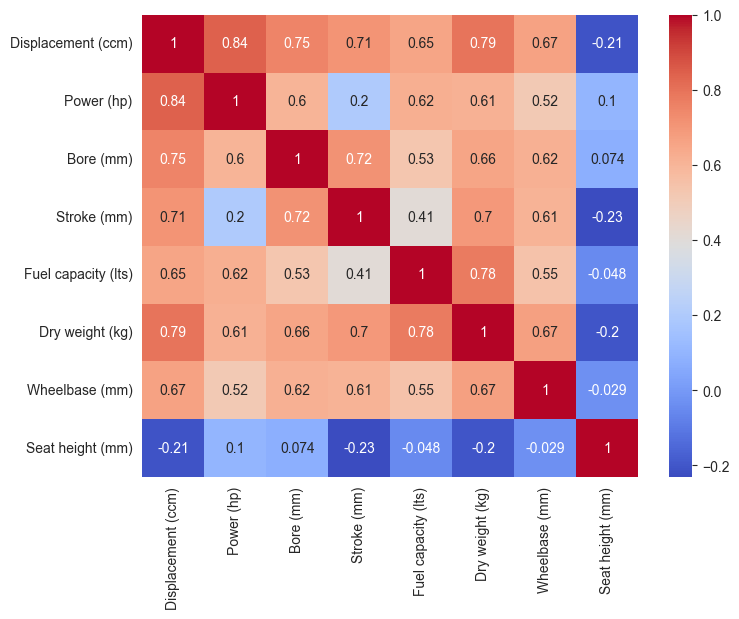

In [70]:
correlation_matrix=workdf[numerical_columns_list].corr()
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()
# workdf[numerical_columns_list].head()

In [71]:
# Set a correlation threshold
correlation_threshold = 0.7

# Set the specific column of interest
specific_column = "Displacement (ccm)"
# correlated_columns=set()
# for i in range(len(correlation_matrix.columns)):
#     for j in range(i):
#         if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
#             colname_i = correlation_matrix.columns[i]
#             colname_j = correlation_matrix.columns[j]
            
#             print(colname_i," - ",colname_j," : ",correlation_matrix.iloc[i, j])
#             print("----------")
            
#             correlated_columns.add(colname_i)
#             correlated_columns.add(colname_j)   
# Identify highly correlated columns to the specific column
highly_correlated_columns = correlation_matrix[specific_column][(abs(correlation_matrix[specific_column]) > correlation_threshold) & (correlation_matrix[specific_column].index != specific_column)].index.tolist()
print(f'Columns with higher than {correlation_threshold} correlation with {specific_column} : {highly_correlated_columns}')

numerical_columns_list = list(filter(lambda i: i not in highly_correlated_columns, numerical_columns_list))

features = list(filter(lambda i: i not in highly_correlated_columns, features))
# Drop the highly correlated columns
workdf_dropped = workdf.drop(highly_correlated_columns, axis=1)
workdf_dropped.shape

Columns with higher than 0.7 correlation with Displacement (ccm) : ['Power (hp)', 'Bore (mm)', 'Stroke (mm)', 'Dry weight (kg)']


(12266, 20)

In [74]:
numerical_columns_list


['Displacement (ccm)',
 'Fuel capacity (lts)',
 'Wheelbase (mm)',
 'Seat height (mm)']

In [75]:
# 3
# remove rows that have 50% of columns as null
workdf_dropped.dropna(thresh=workdf_dropped.shape[1]/2, inplace=True)

In [76]:
workdf_dropped.shape

(12221, 20)

In [77]:
workdf_stat=pd.DataFrame()
workdf_stat['skew']=workdf_dropped[numerical_columns_list].skew()
workdf_stat['kurtosis']=workdf_dropped[numerical_columns_list].kurtosis()
workdf_stat['Mean']=workdf_dropped[numerical_columns_list].mean()
workdf_stat['STD']=workdf_dropped[numerical_columns_list].std()

workdf_stat



,skew,kurtosis,Mean,STD
Displacement (ccm),3.300927,26.474350,540.948859,546.155850
Fuel capacity (lts),0.434892,0.896950,13.272880,5.995702
Wheelbase (mm),0.451964,4.719448,1423.984704,169.015976
Seat height (mm),-0.270549,1.152713,788.905605,85.220574


Based on the provided data:

*Displacement (ccm):*
Skewness = 2.985938 (positive)  
Kurtosis = 24.641551 (positive)  
Interpretation: The distribution of Displacement (ccm) is likely right-skewed (positively skewed) and has heavier tails than a normal distribution (leptokurtic). **It is not normally distributed.**   

*Fuel capacity (lts):*  
Skewness = 0.398549 (close to 0)  
Kurtosis = 0.703285 (close to 0)  
Interpretation: The distribution of Fuel capacity (lts) is approximately symmetric and has tails similar to a normal distribution (mesokurtic). **It is approximately normally distributed.**  

*Wheelbase (mm):*  
Skewness = 0.729586 (positive)  
Kurtosis = 4.747603 (positive)  
Interpretation: The distribution of Wheelbase (mm) is slightly right-skewed (positively skewed) and has heavier tails than a normal distribution (leptokurtic). **It is not normally distributed.**  

*Seat height (mm):*  
Skewness = -0.153437 (negative)  
Kurtosis = 1.013157 (close to 0)  
Interpretation: The distribution of Seat height (mm) is approximately symmetric and has tails similar to a normal distribution (mesokurtic). **It is approximately normally distributed.**  

### Methods for Predicting Nulls in Not Normally Distributed Data

| Method | Advantages | Disadvantages |
|:------:|:----------:|:-------------:|
| Mean imputation | Simple and easy to implement | Can introduce bias into the data |
| Median imputation | Less biased than mean imputation | Can introduce bias if the distribution of the data is skewed |
| KNN imputation | More accurate than mean or median imputation | More complex to implement |
| Bayesian imputation | Most accurate of the methods listed | Most complex to implement |

### Methods for Predicting Nulls in Normally Distributed Data

| Method | Advantages | Disadvantages |
|:------:|:----------:|:-------------:|
| Mean imputation | Simple and easy to implement | Can introduce bias into the data if the distribution of the data is not perfectly normally distributed |
| Median imputation | Less biased than mean imputation | Can introduce bias if the distribution of the data is skewed |


In [79]:
not_normally_distributed=["Displacement (ccm)","Wheelbase (mm)"] #"Stroke (mm)"
normally_distributed=["Fuel capacity (lts)","Seat height (mm)"]


# Impute null values using KNNImputer
# knn_imputer = KNNImputer(n_neighbors=3)
# workdf_imputed = pd.DataFrame(knn_imputer.fit_transform(workdf_dropped[not_normally_distributed]),columns=not_normally_distributed).reset_index(drop=True)
# tmpDf=pd.DataFrame(workdf_dropped[normally_distributed].fillna(workdf_dropped[normally_distributed].median()),columns=normally_distributed).reset_index(drop=True)
# workdf_imputed=pd.concat([workdf_imputed,tmpDf],axis=1)
# workdf_imputed.isnull().sum()

# Create KNNImputer instance
knn_imputer = KNNImputer(n_neighbors=3)

# Impute the columns specified in not_normally_distributed
workdf_dropped[not_normally_distributed] = knn_imputer.fit_transform(workdf_dropped[not_normally_distributed])

# Fill the columns specified in normally_distributed with median values
workdf_dropped[normally_distributed] = workdf_dropped[normally_distributed].fillna(workdf_dropped[normally_distributed].median())

# Check for any remaining missing values in the DataFrame
workdf_dropped[features].isnull().sum()

Displacement (ccm)        0
Engine cylinder           0
Engine stroke             0
Gearbox                1999
Fuel capacity (lts)       0
Fuel control           5393
Cooling system         1307
Transmission type      1991
Wheelbase (mm)            0
Seat height (mm)          0
Fuel system            3522
Front brakes            443
Front tire                0
Front suspension       3971
Rear suspension        4130
dtype: int64

 standard deviation and mean values remain relatively stable before and after imputation
  Lower skewness and kurtosis values indicate a more balanced and symmetric distribution.

In [16]:
workdf_dropped[numerical_columns_list].median()

Displacement (ccm)      448.0
Fuel capacity (lts)      13.6
Wheelbase (mm)         1430.0
Seat height (mm)        790.0
dtype: float64

In [17]:
# Fill missing values in categorical columns with a designated category (e.g., "Unknown")
categorical_columns = workdf.select_dtypes(include=['object']).columns
workdf[categorical_columns] = workdf[categorical_columns].fillna("Unknown")

# Drop rows with missing values in numeric columns
numeric_columns = workdf.select_dtypes(include=['int64', 'float64']).columns
workdf = workdf.dropna(subset=numeric_columns)


In [18]:
distinct_values_count = workdf[categorical_columns].nunique()
print(distinct_values_count)

Brand                  69
Model                1088
Category               16
Engine cylinder        11
Engine stroke           3
Gearbox                 7
Fuel control           11
Cooling system          4
Transmission type       4
Fuel system             7
Rear brakes            30
Front tire             10
Rear tire               6
Front suspension        6
dtype: int64


# Exercise 2 (Encoding of Categorical Data)

In [19]:
workdf.head()


,Brand,Model,Year,Category,Rating,Displacement (ccm),Power (hp),Engine cylinder,Engine stroke,Gearbox,...,Cooling system,Transmission type,Dry weight (kg),Wheelbase (mm),Seat height (mm),Fuel system,Rear brakes,Front tire,Rear tire,Front suspension
47,adiva,ad3 400,2018,Scooter,3.3,399.0,36.7,Single cylinder,four-stroke,Automatic,...,Liquid,Unknown,257.0,1560.0,770.0,injection,single disc,other,other,other
184,aeon,cobra 220,2009,ATV,3.1,196.0,12.1,Single cylinder,four-stroke,Automatic,...,Air,Chain,193.0,1155.0,790.0,carburettor. other,expanding brake (drum brake),other,other,other
187,aeon,cobra 320,2009,ATV,2.7,272.3,19.4,Single cylinder,four-stroke,Automatic,...,Liquid,Chain,211.0,1300.0,790.0,carburettor. other,expanding brake (drum brake),other,other,other
189,aeon,cobra 400,2012,ATV,3.4,346.0,20.1,Single cylinder,four-stroke,Automatic,...,Liquid,Unknown,207.0,1300.0,790.0,carburettor. other,single disc,other,other,other
193,aeon,cobra 50,2009,ATV,3.5,49.0,3.6,Single cylinder,two-stroke,Unknown,...,Air,Shaft drive,130.0,1050.0,800.0,carburettor. other,single disc,other,other,other


In [20]:
# null_values=['Unspecified category', 'Not Given/Unknown', 'not given/unknown']

# for clm in workdf.columns:
#     if workdf[clm].dtype=='object':
#         try:
#             print("Column name:",clm)
#             print(null_values[0],workdf[clm].value_counts(dropna=False).get(null_values[0],0))
#             print(null_values[1],workdf[clm].value_counts(dropna=False).get(null_values[1],0))
#             print(null_values[2],workdf[clm].value_counts(dropna=False).get(null_values[2],0))
#             print('==============================')
#         except:
#             pass
        
        